<a href="https://www.spe.org/events/en/2022/conference/22apog/asia-pacific-oil-and-gas-conference-and-exhibition.html"><img src = "https://www.spe.org/binaries/content/gallery/specms/speevents/organization-logos/spe-logo-2020.png" width = 200> 

<h1 align=center><font size = 5>Prediction of Recovery Factor using Machine Learning Methods</font></h1>

<h1 align=center><font size = 4> Munish Kumar, Kannapan Swaminathan</font></h1>
<h1 align=center><font size = 4> Part 5: Prediction of Recovery Factor</font></h1>
<h1 align=center><font size = 3> ERCE 2022 </font></h1>

## Check PyCaret Version

In [1]:
from pycaret.utils import version
version()

'2.3.6'

#### Libraries

In [2]:
# Only install the following libraries if you dont have it, otherwise leave it commented out

#!conda install -c anaconda natsort --yes
#!conda install -c anaconda xlrd --yes
#!pip install pycaret[full] --user
#!pip install mlflow --user
#!pip install tune-sklearn ray[tune] --user
#!pip install optuna -- user
#!pip install hyperopt --user

# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
from natsort import natsorted
sns.set()

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Sklearn Liraries
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

import ray
from ray import tune

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


In [3]:
# Function to read out file
def file_out(df, dir_name, base_filename, filename_suffix):
    try:
        csvs_sht = os.path.join(dir_name, base_filename + "." + filename_suffix)
        df.to_csv(csvs_sht, index = False, header=True)
        print ("Final File Extract Produced")
    except IOError:
        print("I/O error")
    return

###### Declare some global variables

In [4]:
#Input Data
#dir_name = r'C:\Users\kswaminathan\OneDrive\01_KannaLibrary\15_Analogs'
dir_name = r'C:\Users\mkumar\Documents\GitHub\@Papers\SPE2022\Final\2_GOM_MODEL'
#dir_name = r'C:\Users\quant\Documents\GitHub\SPE_Paper\Final'
filename_suffix = 'csv'

##### Read in the data 

In [5]:
skiprows = 0
#dfblind = pd.read_excel("BlindTest_SSOIL_NEW.xlsx", sheet_name='Inputs', thousands=',', skiprows = skiprows)
dfblind = pd.read_excel("BlindTest_SSOIL.xlsx", thousands=',', skiprows = skiprows)
#dfblind = dfblind.loc[:, ~df.columns.str.contains('^Unnamed')] 
dfblind_ori = dfblind.copy()
#dfblind.drop('307_Recovery factor (ultimate oil) (%)', axis=1, inplace=True)
#dfblind.dropna(axis = 0, inplace=True)

dfblind.head(10)

,CHRONOZONE,Original Oil,SS,THK,TAREA,DRIVE,POROSITY,SW,PERMEABILITY,Pi,TI,RSI,API,BOI,ORF
0,KLL,504000000,8448.06,98.40,3053.48,DEP,0.1755,0.4285,100,3809,139.00,420,39.65,1.190,0.31
1,MLU,124000000,8747.76,323.00,642.15,DEP,0.2300,0.2800,76,4670,201.00,775,33.00,1.400,0.28
2,MUU,6491880,7791.00,13.07,1040.00,DEP,0.3100,0.2000,852,3669,173.33,575,30.00,1.294,0.35
3,MUU,6612660,7511.00,23.63,633.00,WTR,0.2600,0.3300,165,3538,171.33,567,31.00,1.237,0.40
4,MUU,1796305,7925.00,14.12,380.00,WTR,0.2600,0.2700,252,5238,173.33,917,31.00,1.480,0.33
5,MUU,924752,10751.00,11.96,257.00,PAR,0.2600,0.2800,142,7315,203.33,1191,36.00,1.564,0.32
6,MUU,89593809,11783.00,74.66,3021.00,PAR,0.2700,0.2100,365,8653,220.33,1624,33.00,1.763,0.42
7,MUU,16823321,9914.00,12.86,2929.00,PAR,0.2600,0.3300,94,7282,196.33,700,30.00,1.342,0.44
8,MUU,15228649,11466.00,19.17,1488.00,PAR,0.2700,0.2200,363,8420,217.33,599,25.00,1.241,0.43
9,MLU,4540933,9066.00,14.68,796.00,WTR,0.2900,0.2500,312,4086,192.33,1000,36.00,1.310,0.30


## Load the Model

In [6]:
from pycaret.regression import load_model
from pycaret.regression import predict_model

from functools import reduce

final_blend = load_model('Blend_model_15072022')
final_stack = load_model('Stacked_model_15072022')
final_bagged = load_model('Bagged_CB_15072022')
final_cb = load_model('CatBoost_15072022')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [7]:
print(final_blend)

Pipeline(steps=[('dtypes',
                 DataTypes_Auto_infer(ml_usecase='regression', target='ORF')),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels_in_TestData(replacement_strategy='least '
                                                                         'frequent',
                                                    target='ORF...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 VotingRegressor(estimators=[('rf',
                                              RandomForestRegressor(max_depth=9,
                                                                  

In [8]:
BlindPredict1 = predict_model(final_cb, data=dfblind, round=2)
BlindPredict2 = predict_model(final_bagged, data=dfblind, round=2)
BlindPredict3 = predict_model(final_blend, data=dfblind, round=2)
BlindPredict4 = predict_model(final_stack, data=dfblind, round=2)

BlindPredict1 = BlindPredict1.rename(columns={'Label': 'CatBoost Regressor ORF (V/V)'
                                 })
BlindPredict2 = BlindPredict2.rename(columns={'Label': 'Bagged CB Regressor ORF (V/V)'
                                 })
BlindPredict3 = BlindPredict3.rename(columns={'Label': 'Blended ORF (V/V)'
                                 })
BlindPredict4 = BlindPredict4.rename(columns={'Label': 'Stack Regressor ORF (V/V)'
                                 })

BlindPredict_df = [BlindPredict1, BlindPredict2, BlindPredict3, BlindPredict4]

BlindPredict = pd.concat(BlindPredict_df, axis = 0, join = 'outer').drop_duplicates()
BlindPredict = BlindPredict.reset_index(drop=True)

BlindPredict

,CHRONOZONE,Original Oil,SS,THK,TAREA,DRIVE,POROSITY,SW,PERMEABILITY,Pi,TI,RSI,API,BOI,ORF,CatBoost Regressor ORF (V/V),Bagged CB Regressor ORF (V/V),Blended ORF (V/V),Stack Regressor ORF (V/V)
0,KLL,504000000,8448.06,98.40,3053.48,DEP,0.1755,0.4285,100,3809,139.00,420,39.65,1.190,0.31,0.281675,NaN,NaN,NaN
1,MLU,124000000,8747.76,323.00,642.15,DEP,0.2300,0.2800,76,4670,201.00,775,33.00,1.400,0.28,0.291242,NaN,NaN,NaN
2,MUU,6491880,7791.00,13.07,1040.00,DEP,0.3100,0.2000,852,3669,173.33,575,30.00,1.294,0.35,0.321994,NaN,NaN,NaN
3,MUU,6612660,7511.00,23.63,633.00,WTR,0.2600,0.3300,165,3538,171.33,567,31.00,1.237,0.40,0.396991,NaN,NaN,NaN
4,MUU,1796305,7925.00,14.12,380.00,WTR,0.2600,0.2700,252,5238,173.33,917,31.00,1.480,0.33,0.383031,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,PLL,248701,7044.00,15.67,36.00,PAR,0.2500,0.1800,397,5397,172.33,1189,34.00,1.623,0.45,NaN,NaN,NaN,0.311489
3248,MMM,2021622,21300.00,15.91,752.00,WTR,0.2200,0.1600,537,13924,194.33,1171,32.00,1.503,0.18,NaN,NaN,NaN,0.214448
3249,MUM,20619359,10315.00,49.82,1234.00,COM,0.2800,0.2300,410,5585,153.33,1396,30.00,1.785,0.36,NaN,NaN,NaN,0.349187
3250,PL,1386360,15271.00,45.15,41.00,WTR,0.3000,0.1700,946,11850,221.33,747,18.00,1.238,0.48,NaN,NaN,NaN,0.424348


In [9]:
aggregation_functions = {
    'CatBoost Regressor ORF (V/V)': 'sum', 
    'Bagged CB Regressor ORF (V/V)': 'sum',
    'Blended ORF (V/V)': 'sum',
    'Stack Regressor ORF (V/V)': 'sum',
}

labels = dfblind.columns.tolist()

BlindPredict_new = BlindPredict.groupby(labels).aggregate(aggregation_functions)

file_out(BlindPredict, dir_name, 'Blind_Test_Out' , filename_suffix)

BlindPredict_new

I/O error


CatBoost Regressor ORF (V/V)  \
CHRONOZONE Original Oil SS       THK   TAREA   DRIVE POROSITY SW     PERMEABILITY Pi   TI     RSI  API   BOI   ORF                                  
KLL        504000000    8448.06  98.40 3053.48 DEP   0.1755   0.4285 100          3809 139.00 420  39.65 1.190 0.31                      0.281675   
MLL        918051       8359.00  11.24 1140.00 PAR   0.2700   0.4400 52           3918 174.33 848  36.00 1.418 0.45                      0.195671   
           4138750      9761.00  32.30 3402.00 DEP   0.2800   0.2600 292          5715 226.33 1190 36.00 1.600 0.17                      0.208399   
MLM        82838        9283.00  28.22 65.00   PAR   0.2900   0.3200 156          4378 205.33 800  30.00 1.390 0.04                      0.089895   
           479755       5747.00  20.17 89.00   PAR   0.2600   0.3600 78           2716 149.33 2250 35.00 1.302 0.27                      0.327522   
...                                                                                                                                           ...   
PU         17844414     11182.00 59.72 746.00  COM   0.2800   0.2100 418          6176 210.33 1129 35.00 1.667 0.48                      0.472772   
           18437674     7608.00  63.60 1355.00 DEP   0.2600   0.1700 685          3903 128.33 816  35.00 1.422 0.18                      0.244718   
           23131837     8192.00  25.07 3216.00 COM   0.3000   0.1900 884          5602 177.33 1133 35.00 1.526 0.39                      0.404789   
           24379583     6655.00  27.18 1856.00 COM   0.2900   0.2700 485          3542 167.33 645  41.00 1.331 0.49                      0.446207   
           42605620     12761.00 46.37 1683.00 PAR   0.3000   0.2600 322          8476 149.33 1027 28.00 1.432 0.45                      0.371462   

                                                                                                                     Bagged CB Regressor ORF (V/V)  \
CHRONOZONE Original Oil SS       THK   TAREA   DRIVE POROSITY SW     PERMEABILITY Pi   TI     RSI  API   BOI   ORF                                   
KLL        504000000    8448.06  98.40 3053.48 DEP   0.1755   0.4285 100          3809 139.00 420  39.65 1.190 0.31                       0.284441   
MLL        918051       8359.00  11.24 1140.00 PAR   0.2700   0.4400 52           3918 174.33 848  36.00 1.418 0.45                       0.209161   
           4138750      9761.00  32.30 3402.00 DEP   0.2800   0.2600 292          5715 226.33 1190 36.00 1.600 0.17                       0.245044   
MLM        82838        9283.00  28.22 65.00   PAR   0.2900   0.3200 156          4378 205.33 800  30.00 1.390 0.04                       0.088116   
           479755       5747.00  20.17 89.00   PAR   0.2600   0.3600 78           2716 149.33 2250 35.00 1.302 0.27                       0.318210   
...                                                                                                                                            ...   
PU         17844414     11182.00 59.72 746.00  COM   0.2800   0.2100 418          6176 210.33 1129 35.00 1.667 0.48                       0.442032   
           18437674     7608.00  63.60 1355.00 DEP   0.2600   0.1700 685          3903 128.33 816  35.00 1.422 0.18                       0.244511   
           23131837     8192.00  25.07 3216.00 COM   0.3000   0.1900 884          5602 177.33 1133 35.00 1.526 0.39                       0.408695   
           24379583     6655.00  27.18 1856.00 COM   0.2900   0.2700 485          3542 167.33 645  41.00 1.331 0.49                       0.439686   
           42605620     12761.00 46.37 1683.00 PAR   0.3000   0.2600 322          8476 149.33 1027 28.00 1.432 0.45                       0.378925   

                                                                                                                     Blended ORF (V/V)  \
CHRONOZONE Original Oil SS       THK   TAREA   DRIVE POROSITY SW     PERMEABILITY Pi   TI 

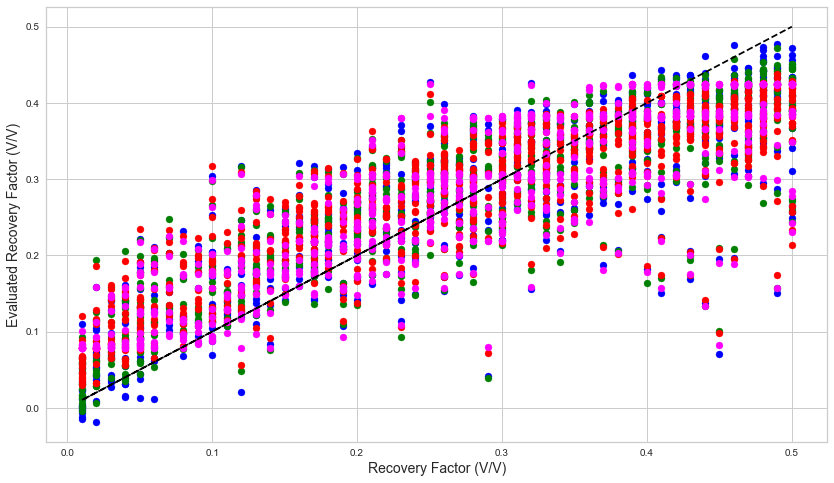

In [10]:
a = BlindPredict['ORF']
b = BlindPredict['CatBoost Regressor ORF (V/V)']
c = BlindPredict['Bagged CB Regressor ORF (V/V)']
d = BlindPredict['Blended ORF (V/V)']
e = BlindPredict['Stack Regressor ORF (V/V)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.scatter(a, c, color='green')
plt.scatter(a, d, color='red')
plt.scatter(a, e, color='magenta')
plt.plot(a, a, color = 'black', ls = '--', label = 'x=y')
plt.xlabel("Recovery Factor (V/V)", size=14)
plt.ylabel("Evaluated Recovery Factor (V/V)", size=14)

#plt.tight_layout()
plt.show()

In [11]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 3.9279398918151855 seconds
